## Demo of bmtool synaptic tuner
### First we must define some general settings and the settings for the connection we would like to tune. Below is an example of what this could look like for excitatory and inhibitory connections. Currently all of these settings, but the ones in the spec_syn_param are needed in order to use the tuner. You can copy all of the general_settings as these should be general enough to use for any case. The spec_settings are going to depend on your exact use case and connection type 

In [1]:
general_settings = {
    'vclamp': True, # if vclamp should start on or off used mostly for singleEventv
    'rise_interval': (0.1, 0.9), #10-90%
    'tstart': 500., # when the singleEvent should start
    'tdur': 100.,    # Dur of sim after single synaptic event has occured
    'threshold': -15., #threshold for spike in mV
    'delay': 1.3, # netcon delay
    'weight': 1., # netcon weight
    'dt': 0.025, # simulation dt
    'celsius': 20 # temp of sim
}

conn_type_settings = {
    'Exc2CP': {
        'spec_settings': {
            'post_cell': 'CP_Cell', #template name
            'vclamp_amp' : -70., # what V to clamp at will be syn depended 
            'sec_x': 0.4, # location of syn
            'sec_id': 1,  # location of syn
            "level_of_detail": "AMPA_NMDA_STP", # which synaptic mech to use
        },
        'spec_syn_param': { # parameters in modfile you want to change
            'initW': 0.19,
            'tau_r_AMPA': 0.9,
            'tau_d_AMPA': 19.5,
            'Use': 0.56,
            'Dep': 175.0,
            'Fac': 0.0,
        },
    },
    'Inh2FSI': {
        'spec_settings': {
            'post_cell': 'FSI_Cell',
            'vclamp_amp': -55,
            'sec_x': 0.5,
            'sec_id':0,
            "level_of_detail": "GABA_A_STP",
        },
        'spec_syn_param': {
            'initW': 20,
            'tau_r_GABAA': 0.9,
            'tau_d_GABAA': 15,
            'e_GABAA':-75,
            'Use': 0.4,
            'Dep': 190.,
            'Fac': 15.
        },
    },

}

### Then the modfiles must be compiled in order for the tuner to work properly 

In [2]:
import os

if not os.path.isdir("x86_64"):
    os.chdir('modfiles')
    os.system("nrnivmodl")
    os.chdir("..")

/home/gjgpb9/miniconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/gjgpb9/cortex_modeling/bmtool/examples/synapses/modfiles
Mod files: "./AMPA_NMDA_STP.mod" "./cadad.mod" "./cal2.mod" "./can_mig.mod" "./exp2syn_stp.mod" "./GABA_A_STP.mod" "./gap.mod" "./Gfluct.mod" "./h_kole.mod" "./imCA3.mod" "./kap_BS.mod" "./kBK.mod" "./kdmc_BS.mod" "./kdr_BS.mod" "./kdrCA3.mod" "./kdrinter.mod" "./leak.mod" "./nainter.mod" "./napCA3.mod" "./natCA3.mod" "./nax_BS.mod" "./vecevent_coreneuron.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


### Now we can initialize the synaptic tuner. You must call the SingleEvent method before using the interactiveTuner. When initializing you will have to change a few arguments depending on your use case. other_vars_to_record can be any variable in your synaptic mechanism, while slider_vars can be any range variable you wish to tune in the synapse. If the variable is not defined in the spec_syn_param than the tuner will get the value from the mechanism and try to set up some sliders to tune it.

In [3]:
mechanisms_dir = 'modfiles'
templates_file = 'templates.hoc'
#json_folder_path = os.path.join('..', 'Model-Parameters' , 'components', 'synaptic_models','synapses_M1_match')
# Initialize the SynapseModule
from bmtool.synapses import SynapseTuner
synapse_module = SynapseTuner(mechanisms_dir=mechanisms_dir, # where x86_64 is located
                               templates_dir=templates_file, # where the neuron templates are located
                               conn_type_settings=conn_type_settings, # dict of connection settings
                               general_settings = general_settings, # dict of general settings
                               connection = 'Exc2CP', # key in connection settings for which connection you want to tune
                               #json_folder_path=json_folder_path, # If your network uses json files the path can be set to update the connection settings based on the keys and values in the json
                               current_name = 'i', # name of current variable in synapase
                               other_vars_to_record = ['record_Pr', 'record_use'], # Other synaptic variables you wish to record besides the normal ones
                               slider_vars=['initW','Dep','Fac','Use','tau_r_AMPA']) # Range variables you want to tune to adjust synaptic response.


--No graphics will be displayed.


### The SingleEvent method will run a short pulse and then print out the synaptic properties for the synapse.  

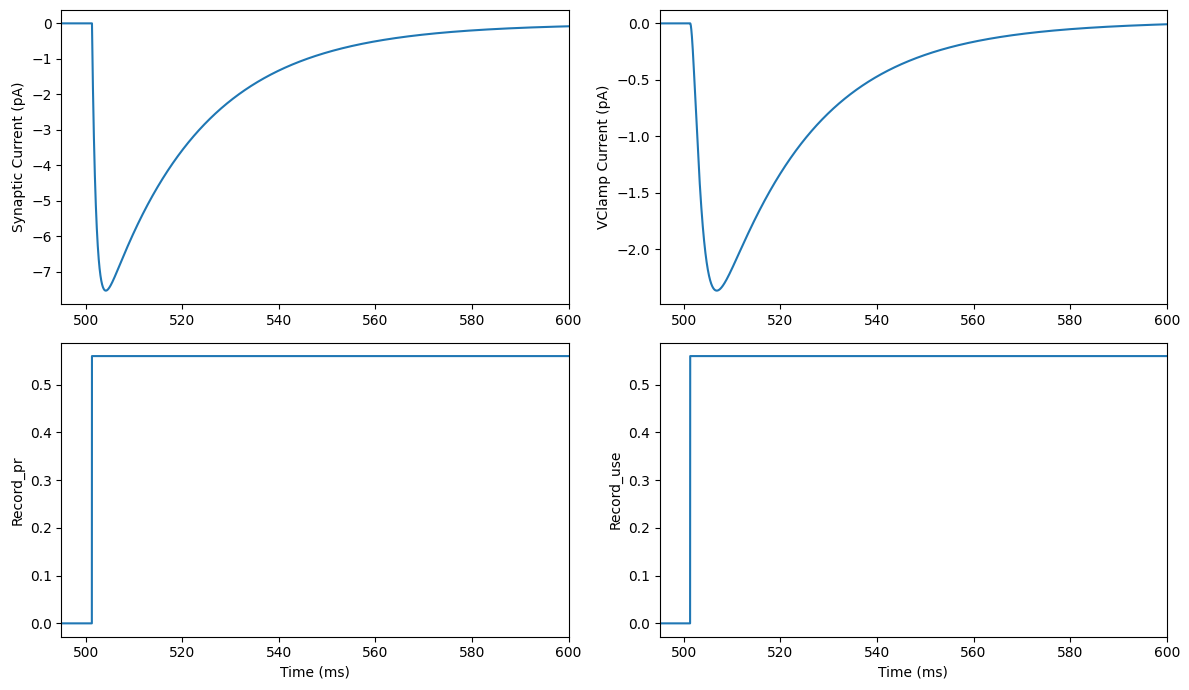

('baseline', -0.030587425296261017)
('sign', -1.0)
('latency', 1.35)
('amp', 0.0023675039659281083)
('rise_time', 2.9250000000000003)
('decay_time', 19.83137473273415)
('half_width', 20.6)


In [4]:
synapse_module.SingleEvent()

### The InteractiveTuner will deliver an input to the cell at a desired weight and frequency. The frequency by default will be 8 spikes then a 250ms delay and then 4 more spikes. 

Paired-pulse ratio is (Avg 2nd pulse - Avg 1st pulse) ÷ 90th percentile amplitude.

Induction is (Avg (6th, 7th, 8th pulses) - Avg 1st pulse) ÷ 90th percentile amplitude. 

Recovery is (Avg (9th, 10th, 11th, 12th pulses) - Avg (1st, 2nd, 3rd, 4th pulses)) ÷ 90th percentile amplitude

In [5]:
synapse_module.InteractiveTuner()

Setting up slider! The sliders ranges are set by their init value so try changing that if you dont like the slider range!
Fac was set to zero, going to try to set a range of values, try settings the Fac to a nonzero value if you dont like the range!
